 #### Necessary Libraries

In [2]:
import pandas as pd
import os

#### Merging 12 Months of Data into One

In [10]:
#Read the files names

path = './data'
for file in os.listdir(path):
    if not file.startswith('.'):
        files = os.listdir(path) 
        

#Merge the file into one
sales_data = pd.DataFrame()

for file in files:
    file_data = pd.read_csv(path + '/'+ file, sep =',')
    sales_data = pd.concat([sales_data, file_data])
    
sales_data.to_csv(path+'/sales_data.csv', index=False)

#### Read the combined data to sdata Data Frame

In [234]:
sdata = pd.read_csv(path+'/sales_data.csv', sep = ',')
sdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


#### Clean the Data

##### Task 1: Drop Rows of NAN

In [245]:
# Finding the NAN rows
Nan_rows = sdata[sdata.isna().any(axis = 1 )]
display(Nan_rows.shape)

#Dropping the NAN rows
sdata.dropna(how='all', axis=0, inplace = True)

(0, 7)

##### Task 2: Find 'Or' and Delete it

In [247]:
or_rows = sdata[sdata['Order Date'].str[0:2] == 'Or']

sdata = sdata[sdata['Order Date'].str[0:2] != 'Or']

##### Cast Columns to Correct Type

In [248]:
sdata['Quantity Ordered'] = pd.to_numeric(sdata['Quantity Ordered'])
sdata['Price Each'] = pd.to_numeric(sdata['Price Each'])

 #### Add Additional Necessary Columns

###### Task 1: Add Month Column

In [249]:
sdata['Month'] = sdata['Order Date'].str[0:2]
sdata['Month'] = sdata['Month'].astype(int)

sdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1.0,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1.0,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2.0,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1.0,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1.0,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


###### Alternative

In [251]:
sdata['Month 2'] = pd.to_datetime(sdata['Order Date']).dt.month
sdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,259358,34in Ultrawide Monitor,1.0,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,10
1,259359,27in 4K Gaming Monitor,1.0,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,10
2,259360,AAA Batteries (4-pack),2.0,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,10
3,259361,27in FHD Monitor,1.0,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,10
4,259362,Wired Headphones,1.0,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,10


###### Add a Sales Column

In [252]:
sdata['Revenue'] = sdata['Quantity Ordered'].astype('int') * sdata['Price Each'].astype('float')

###### Add a City Column

In [253]:
def get_city(address):
    return address.split(',')[1].strip(' ')

def get_state(address):
    return address.split(',')[2].split(' ')[1]

sdata['City'] = sdata['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

##### Question 1: What was the best month for sales?How much was earned in that month?

In [254]:
month_sales = sdata.groupby(['Month']).sum()
month_sales.drop(['Month 2'], axis = 1, inplace=True)
month_sales.reset_index(inplace=True)

#Sorting Revenue from highest to lowest
month_sales.sort_values(by=['Revenue'], axis=0, ascending=False)


,Month,Quantity Ordered,Price Each,Revenue
11,12,28114.0,4.588415e+06,4.613443e+06
9,10,22703.0,3.715555e+06,3.736727e+06
3,4,20558.0,3.367671e+06,3.390670e+06
10,11,19798.0,3.180601e+06,3.199603e+06
4,5,18667.0,3.135125e+06,3.152607e+06
2,3,17005.0,2.791208e+06,2.807100e+06
6,7,16072.0,2.632540e+06,2.647776e+06
5,6,15253.0,2.562026e+06,2.577802e+06
7,8,13448.0,2.230345e+06,2.244468e+06
1,2,13449.0,2.188885e+06,2.202022e+06


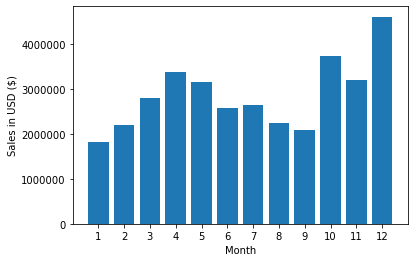

In [255]:
# Importing the pyplot namespace
import matplotlib.pyplot as plt  

plt.bar(month_sales['Month'], month_sales['Revenue'])

plt.title('Monthly Sales')

plt.xticks(month_sales['Month'])
plt.xlabel('Month')

plt.ylabel('Sales in USD ($)')

# Removes Scientific notation
plt.ticklabel_format(style='plain')

plt.show()

##### Question 2:  What city sold the most product?

In [256]:
city_sales = sdata.groupby(['City']).sum()

city_sales.reset_index(inplace=True)
city_sales.drop(['Month 2'], axis = 1, inplace=True)

display(city_sales.sort_values(by=['Revenue'], ascending= False))

,City,Quantity Ordered,Price Each,Month,Revenue
8,San Francisco (CA),50239.0,8.211462e+06,315520,8.262204e+06
4,Los Angeles (CA),33289.0,5.421435e+06,208325,5.452571e+06
5,New York City (NY),27932.0,4.635371e+06,175741,4.664317e+06
2,Boston (MA),22528.0,3.637410e+06,141112,3.661642e+06
0,Atlanta (GA),16602.0,2.779908e+06,104794,2.795499e+06
3,Dallas (TX),16730.0,2.752628e+06,104620,2.767975e+06
9,Seattle (WA),16553.0,2.733296e+06,104941,2.747755e+06
7,Portland (OR),11303.0,1.860558e+06,70621,1.870732e+06
1,Austin (TX),11153.0,1.809874e+06,69829,1.819582e+06
6,Portland (ME),2750.0,4.471893e+05,17144,4.497583e+05


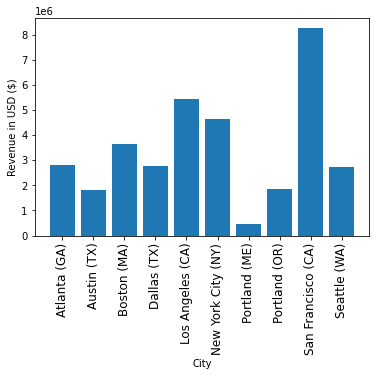

In [257]:
plt.bar(city_sales['City'], city_sales['Revenue'])

plt.title('Sales City-wise')

plt.xticks(city_sales['City'], rotation = 'vertical', size=12)
plt.xlabel('City')
plt.ylabel('Revenue in USD ($)')

plt.show()

##### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [258]:
# Create a hour column
sdata['Hour'] = pd.to_datetime(sdata['Order Date']).dt.hour
sdata['Count'] = 1

sdata.groupby(['Hour']).count()['Count']

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Count, dtype: int64

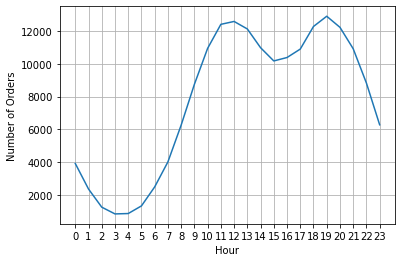

In [259]:
#Plotting Hourly Orders Line Graph
keys = [pair for pair, df in sdata.groupby(['Hour'])]

plt.plot(keys, sdata.groupby(['Hour']).count()['Count'])

plt.title('Hourly Orders')

plt.xticks(keys)
plt.xlabel('Hour')

plt.ylabel('Number of Orders')

plt.grid()

plt.show()

# Before the Peak Hours(11am and 7pm)

##### Question 4: What products are most often sold together?

In [260]:
# Creating a DataFrame with Products Appearing on similar orders
ID_data = sdata[sdata.duplicated('Order ID', keep=False)]

ID_data['2Products'] = ID_data.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
Prodp = ID_data[['Order ID', '2Products']].drop_duplicates()

Prodp

<ipython-input-260-c5109440777b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ID_data['2Products'] = ID_data.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


,Order ID,2Products
62,259420,"Google Phone,USB-C Charging Cable"
65,259422,"Google Phone,USB-C Charging Cable"
82,259438,"iPhone,Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,"LG Dryer,AAA Batteries (4-pack)"
...,...,...
186747,248053,"AA Batteries (4-pack),20in Monitor"
186763,248068,"Bose SoundSport Headphones,AA Batteries (4-pack)"
186784,248088,"ThinkPad Laptop,Bose SoundSport Headphones"
186802,248105,"Google Phone,Wired Headphones"


In [263]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in Prodp['2Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(20):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

##### Question 5: What product sold the most? Why do you think it sold the most?

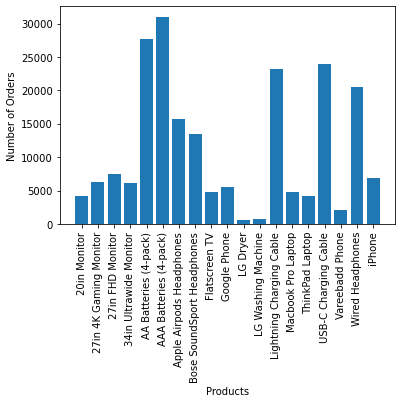

In [277]:
prod_sales = sdata.groupby(['Product'])
prod_orders = prod_sales.sum()['Quantity Ordered']

keys = [pair for pair, df in prod_sales]

plt.bar(keys, prod_orders)
plt.title('Product Orders')

plt.xticks(keys, rotation='vertical', size=10)
plt.xlabel('Products')

plt.ylabel('Number of Orders')

plt.show()

<ipython-input-283-efea98abb8a9>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


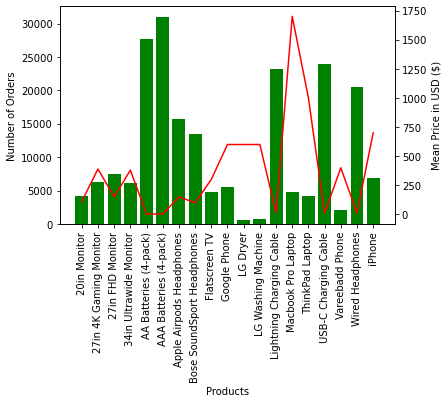

In [283]:
prices = sdata.groupby(['Product']).mean()['Price Each']

fig, ab1 = plt.subplots()

ab2 = ab1.twinx()

ab1.bar(keys, prod_orders, color='green')
ab2.plot(keys, prices, color = 'red')

ab1.set_xticklabels(keys, rotation='vertical', size=10)
ab1.set_xlabel('Products')

ab1.set_ylabel('Number of Orders')
ab2.set_ylabel('Mean Price in USD ($)')

fig.show()